In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             confusion_matrix, classification_report, roc_auc_score, roc_curve)

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Imbalanced Learning
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from scipy import stats

# Load the dataset
df = pd.read_csv('Credit_Card_Default.csv')

print("="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"\nDataset Shape: {df.shape}")
print(f"Number of Records: {df.shape[0]}")
print(f"Number of Features: {df.shape[1]}")

print("\n" + "="*80)
print("FIRST 5 ROWS")
print("="*80)
print(df.head())

print("\n" + "="*80)
print("DATASET INFO")
print("="*80)
print(df.info())

print("\n" + "="*80)
print("STATISTICAL SUMMARY")
print("="*80)
print(df.describe())

DATASET OVERVIEW

Dataset Shape: (30000, 25)
Number of Records: 30000
Number of Features: 25

FIRST 5 ROWS
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   3


EXPLORATORY DATA ANALYSIS

Target Variable Distribution:
default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64

Target Variable Proportions:
default.payment.next.month
0    0.7788
1    0.2212
Name: proportion, dtype: float64


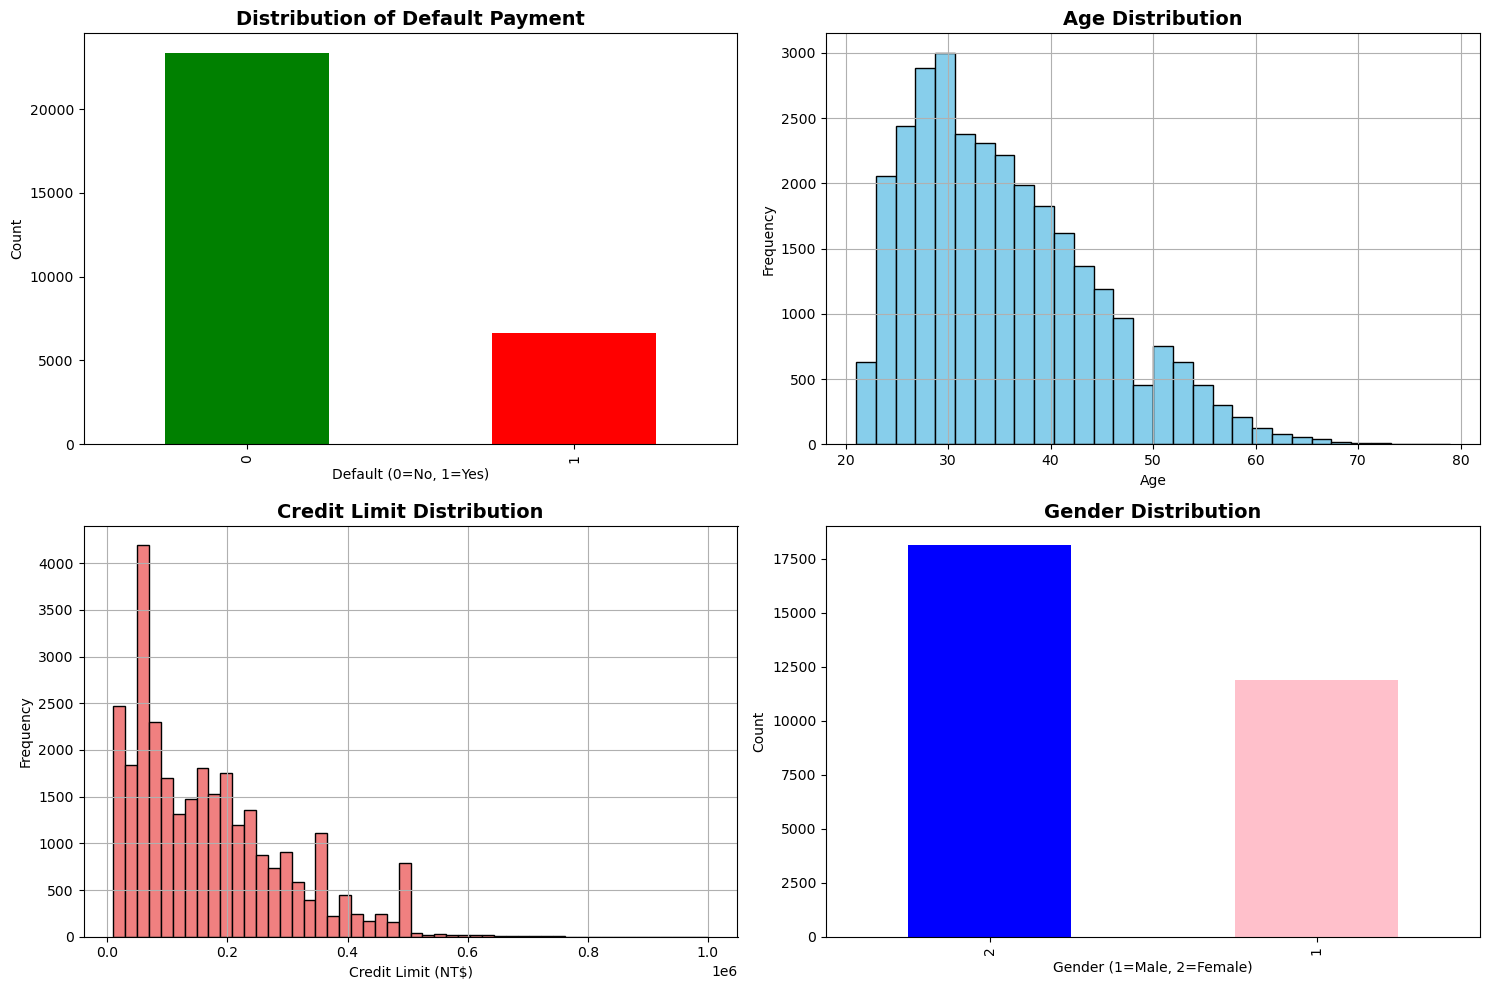

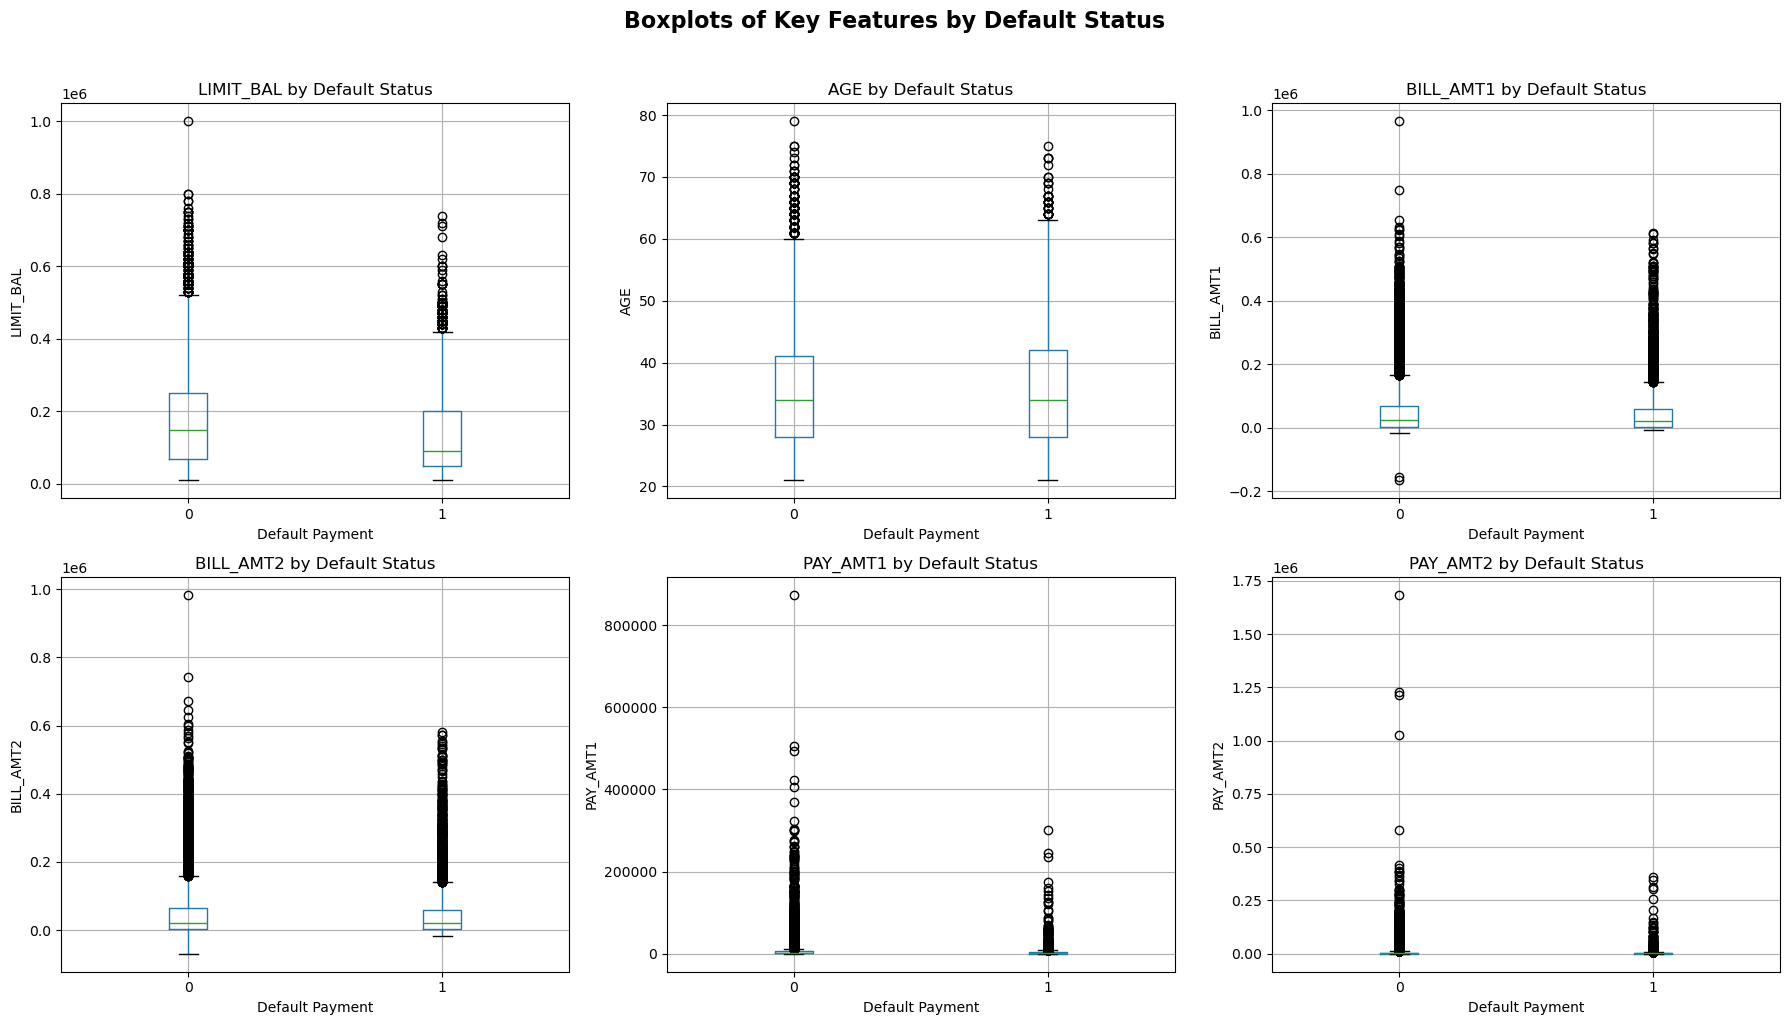

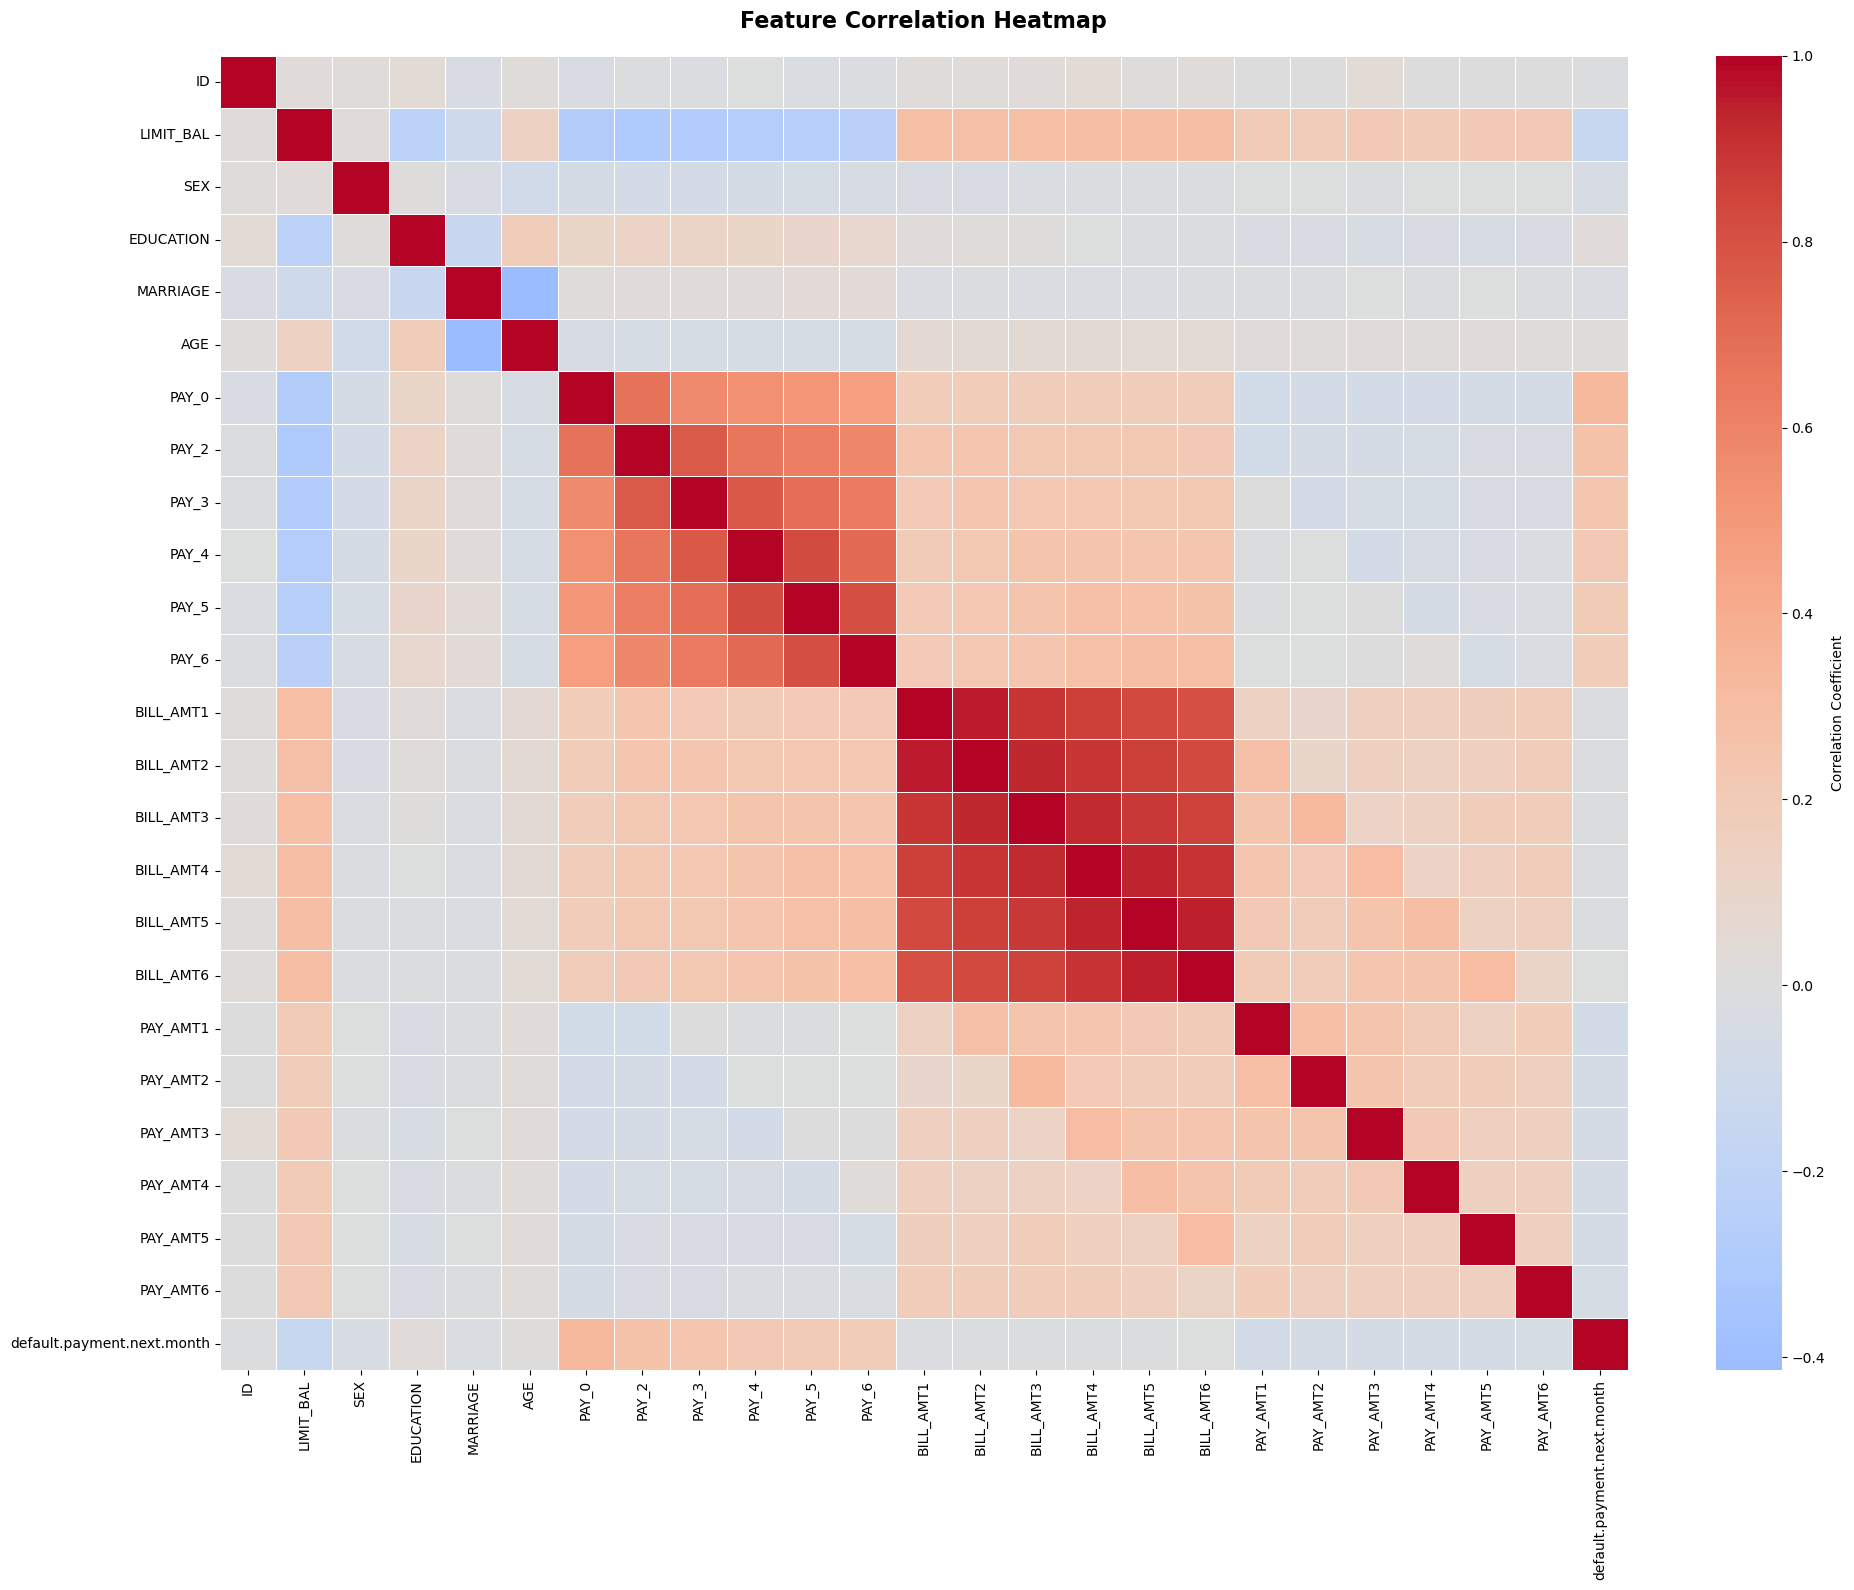


Top 10 Correlations with Target Variable:
default.payment.next.month    1.000000
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
EDUCATION                     0.028006
AGE                           0.013890
BILL_AMT6                    -0.005372
Name: default.payment.next.month, dtype: float64

Payment Status Distribution:

PAY_0:
PAY_0
-2     2759
-1     5686
 0    14737
 1     3688
 2     2667
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
Name: count, dtype: int64

PAY_2:
PAY_2
-2     3782
-1     6050
 0    15730
 1       28
 2     3927
 3      326
 4       99
 5       25
 6       12
 7       20
 8        1
Name: count, dtype: int64

PAY_3:
PAY_3
-2     4085
-1     5938
 0    15764
 1        4
 2     3819
 3      240
 4       76
 5       21
 6       23
 7       27
 8        

In [4]:

print("\n" + "="*80)
print("EXPLORATORY DATA ANALYSIS")
print("="*80)

# Check target variable distribution
print("\nTarget Variable Distribution:")
print(df['default.payment.next.month'].value_counts())
print("\nTarget Variable Proportions:")
print(df['default.payment.next.month'].value_counts(normalize=True))

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Target distribution
df['default.payment.next.month'].value_counts().plot(kind='bar', ax=axes[0,0], color=['green', 'red'])
axes[0,0].set_title('Distribution of Default Payment', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Default (0=No, 1=Yes)')
axes[0,0].set_ylabel('Count')

# Age distribution
df['AGE'].hist(bins=30, ax=axes[0,1], color='skyblue', edgecolor='black')
axes[0,1].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Age')
axes[0,1].set_ylabel('Frequency')

# Credit limit distribution
df['LIMIT_BAL'].hist(bins=50, ax=axes[1,0], color='lightcoral', edgecolor='black')
axes[1,0].set_title('Credit Limit Distribution', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Credit Limit (NT$)')
axes[1,0].set_ylabel('Frequency')

# Gender distribution
df['SEX'].value_counts().plot(kind='bar', ax=axes[1,1], color=['blue', 'pink'])
axes[1,1].set_title('Gender Distribution', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Gender (1=Male, 2=Female)')
axes[1,1].set_ylabel('Count')

plt.tight_layout()
plt.savefig('eda_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# Boxplots for key features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
features_to_plot = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'PAY_AMT1', 'PAY_AMT2']

for idx, feature in enumerate(features_to_plot):
    row = idx // 3
    col = idx % 3
    df.boxplot(column=feature, by='default.payment.next.month', ax=axes[row, col])
    axes[row, col].set_title(f'{feature} by Default Status')
    axes[row, col].set_xlabel('Default Payment')
    axes[row, col].set_ylabel(feature)

plt.suptitle('Boxplots of Key Features by Default Status', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('feature_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(20, 16))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            linewidths=0.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Top correlations with target
target_corr = correlation_matrix['default.payment.next.month'].sort_values(ascending=False)
print("\nTop 10 Correlations with Target Variable:")
print(target_corr.head(10))

# Payment status analysis
payment_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
print("\nPayment Status Distribution:")
for col in payment_cols:
    print(f"\n{col}:")
    print(df[col].value_counts().sort_index())

In [5]:

print("\n" + "="*80)
print("MISSING VALUES & OUTLIER TREATMENT")
print("="*80)

# Check missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
if missing_values.sum() == 0:
    print("No missing values found!")

# Outlier detection using IQR method
def detect_outliers_iqr(data, columns):
    outlier_summary = {}
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outlier_summary[col] = len(outliers)
    return outlier_summary

numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove('ID')  # Remove ID column
numerical_cols.remove('default.payment.next.month')  # Remove target

outlier_summary = detect_outliers_iqr(df, numerical_cols)
print("\nOutlier Count by Feature (IQR Method):")
for col, count in sorted(outlier_summary.items(), key=lambda x: x[1], reverse=True):
    print(f"{col}: {count} outliers ({count/len(df)*100:.2f}%)")

# Handle extreme outliers using capping (winsorization)
df_processed = df.copy()
for col in ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
            'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']:
    Q1 = df_processed[col].quantile(0.01)
    Q99 = df_processed[col].quantile(0.99)
    df_processed[col] = df_processed[col].clip(lower=Q1, upper=Q99)

print("\nOutliers handled using winsorization (1st and 99th percentiles)")


MISSING VALUES & OUTLIER TREATMENT

Missing Values:
Series([], dtype: int64)
No missing values found!

Outlier Count by Feature (IQR Method):
PAY_2: 4410 outliers (14.70%)
PAY_3: 4209 outliers (14.03%)
PAY_4: 3508 outliers (11.69%)
PAY_0: 3130 outliers (10.43%)
PAY_6: 3079 outliers (10.26%)
PAY_AMT4: 2994 outliers (9.98%)
PAY_5: 2968 outliers (9.89%)
PAY_AMT6: 2958 outliers (9.86%)
PAY_AMT5: 2945 outliers (9.82%)
PAY_AMT1: 2745 outliers (9.15%)
BILL_AMT5: 2725 outliers (9.08%)
PAY_AMT2: 2714 outliers (9.05%)
BILL_AMT6: 2693 outliers (8.98%)
BILL_AMT4: 2622 outliers (8.74%)
PAY_AMT3: 2598 outliers (8.66%)
BILL_AMT3: 2469 outliers (8.23%)
BILL_AMT1: 2400 outliers (8.00%)
BILL_AMT2: 2395 outliers (7.98%)
EDUCATION: 454 outliers (1.51%)
AGE: 272 outliers (0.91%)
LIMIT_BAL: 167 outliers (0.56%)
SEX: 0 outliers (0.00%)
MARRIAGE: 0 outliers (0.00%)

Outliers handled using winsorization (1st and 99th percentiles)


In [6]:

print("\n" + "="*80)
print("FEATURE ENGINEERING & PREPROCESSING")
print("="*80)

# Create new features
df_processed['AVG_PAYMENT_STATUS'] = df_processed[payment_cols].mean(axis=1)
df_processed['MAX_PAYMENT_DELAY'] = df_processed[payment_cols].max(axis=1)
df_processed['TOTAL_BILL_AMT'] = df_processed[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
                                                 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)
df_processed['TOTAL_PAY_AMT'] = df_processed[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 
                                               'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)
df_processed['UTILIZATION_RATIO'] = df_processed['TOTAL_BILL_AMT'] / (df_processed['LIMIT_BAL'] + 1)

print("New features created:")
print("- AVG_PAYMENT_STATUS")
print("- MAX_PAYMENT_DELAY")
print("- TOTAL_BILL_AMT")
print("- TOTAL_PAY_AMT")
print("- UTILIZATION_RATIO")

# Check skewness
skewness = df_processed[numerical_cols].skew()
print("\nSkewness of numerical features:")
print(skewness.sort_values(ascending=False))

# Prepare features and target
X = df_processed.drop(['ID', 'default.payment.next.month'], axis=1)
y = df_processed['default.payment.next.month']

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                      random_state=42, stratify=y)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Training set default rate: {y_train.mean():.4f}")
print(f"Test set default rate: {y_test.mean():.4f}")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled using StandardScaler")


FEATURE ENGINEERING & PREPROCESSING
New features created:
- AVG_PAYMENT_STATUS
- MAX_PAYMENT_DELAY
- TOTAL_BILL_AMT
- TOTAL_PAY_AMT
- UTILIZATION_RATIO

Skewness of numerical features:
PAY_AMT2     30.453817
PAY_AMT3     17.216635
PAY_AMT1     14.668364
PAY_AMT4     12.904985
PAY_AMT5     11.127417
PAY_AMT6     10.640727
BILL_AMT4     2.224446
BILL_AMT5     2.215094
BILL_AMT6     2.214609
BILL_AMT3     2.188063
BILL_AMT2     2.159753
BILL_AMT1     2.154584
PAY_5         1.008197
PAY_4         0.999629
EDUCATION     0.970972
PAY_6         0.948029
LIMIT_BAL     0.890065
PAY_3         0.840682
PAY_2         0.790565
AGE           0.732246
PAY_0         0.731975
MARRIAGE     -0.018742
SEX          -0.424183
dtype: float64

Training set size: 24000 samples
Test set size: 6000 samples
Training set default rate: 0.2212
Test set default rate: 0.2212

Features scaled using StandardScaler


In [7]:

print("\n" + "="*80)
print("MODEL BUILDING - BASELINE MODELS")
print("="*80)

# Dictionary to store results
results = {}

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(random_state=42, probability=True),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss')
}

# Train and evaluate models
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='f1')
    
    # Check overfitting
    overfitting = "Yes" if (train_accuracy - test_accuracy) > 0.05 else "No"
    
    # Store results
    results[name] = {
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'CV F1 Mean': cv_scores.mean(),
        'CV F1 Std': cv_scores.std(),
        'Overfitting': overfitting,
        'Model': model
    }
    
    print(f"{name} - Test Accuracy: {test_accuracy:.4f}, F1 Score: {f1:.4f}, Overfitting: {overfitting}")


MODEL BUILDING - BASELINE MODELS

Training Logistic Regression...
Logistic Regression - Test Accuracy: 0.8078, F1 Score: 0.3519, Overfitting: No

Training Decision Tree...
Decision Tree - Test Accuracy: 0.7233, F1 Score: 0.4016, Overfitting: Yes

Training Random Forest...
Random Forest - Test Accuracy: 0.8105, F1 Score: 0.4593, Overfitting: Yes

Training KNN...
KNN - Test Accuracy: 0.7937, F1 Score: 0.4337, Overfitting: No

Training SVM...
SVM - Test Accuracy: 0.8145, F1 Score: 0.4476, Overfitting: No

Training Naive Bayes...
Naive Bayes - Test Accuracy: 0.7508, F1 Score: 0.4978, Overfitting: No

Training Gradient Boosting...
Gradient Boosting - Test Accuracy: 0.8162, F1 Score: 0.4590, Overfitting: No

Training AdaBoost...
AdaBoost - Test Accuracy: 0.8180, F1 Score: 0.4583, Overfitting: No

Training XGBoost...
XGBoost - Test Accuracy: 0.8098, F1 Score: 0.4590, Overfitting: Yes


In [8]:

print("\n" + "="*80)
print("HANDLING CLASS IMBALANCE WITH SMOTE")
print("="*80)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print(f"\nOriginal training set distribution:")
print(y_train.value_counts())
print(f"\nSMOTE training set distribution:")
print(pd.Series(y_train_smote).value_counts())

# Train models with SMOTE
results_smote = {}

for name, model_class in [('Logistic Regression', LogisticRegression(random_state=42, max_iter=1000)),
                           ('Random Forest', RandomForestClassifier(random_state=42, n_estimators=100)),
                           ('XGBoost', XGBClassifier(random_state=42, eval_metric='logloss'))]:
    print(f"\nTraining {name} with SMOTE...")
    
    model_class.fit(X_train_smote, y_train_smote)
    
    y_train_pred = model_class.predict(X_train_smote)
    y_test_pred = model_class.predict(X_test_scaled)
    
    train_accuracy = accuracy_score(y_train_smote, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    
    overfitting = "Yes" if (train_accuracy - test_accuracy) > 0.05 else "No"
    
    results_smote[f"{name} (SMOTE)"] = {
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Overfitting': overfitting,
        'Model': model_class
    }
    
    print(f"{name} (SMOTE) - Test Accuracy: {test_accuracy:.4f}, F1 Score: {f1:.4f}")


HANDLING CLASS IMBALANCE WITH SMOTE

Original training set distribution:
default.payment.next.month
0    18691
1     5309
Name: count, dtype: int64

SMOTE training set distribution:
default.payment.next.month
0    18691
1    18691
Name: count, dtype: int64

Training Logistic Regression with SMOTE...
Logistic Regression (SMOTE) - Test Accuracy: 0.7167, F1 Score: 0.4994

Training Random Forest with SMOTE...
Random Forest (SMOTE) - Test Accuracy: 0.7920, F1 Score: 0.4992

Training XGBoost with SMOTE...
XGBoost (SMOTE) - Test Accuracy: 0.7937, F1 Score: 0.4714



DETAILED MODEL EVALUATION

Best Model: Logistic Regression (SMOTE)
F1 Score: 0.4994

Classification Report:
              precision    recall  f1-score   support

  No Default       0.88      0.74      0.80      4673
     Default       0.41      0.64      0.50      1327

    accuracy                           0.72      6000
   macro avg       0.64      0.69      0.65      6000
weighted avg       0.77      0.72      0.74      6000



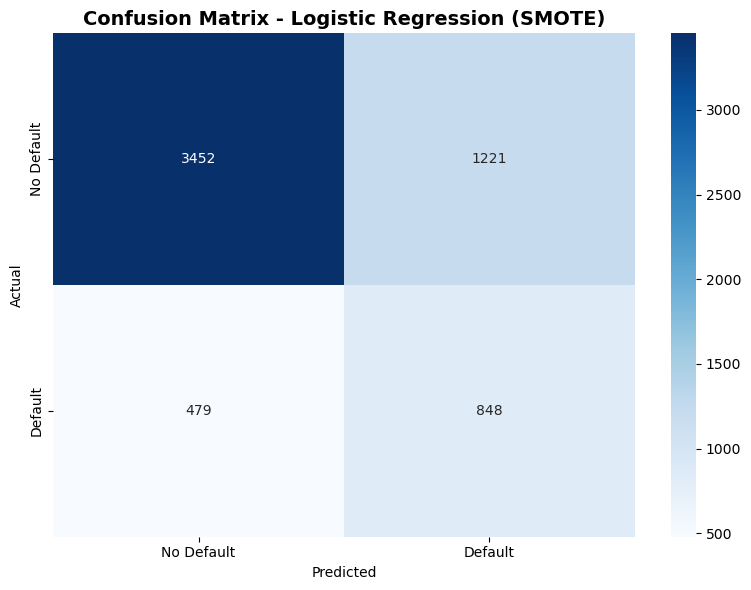

In [9]:

print("\n" + "="*80)
print("DETAILED MODEL EVALUATION")
print("="*80)

# Find best model
all_results = {**results, **results_smote}
best_model_name = max(all_results, key=lambda x: all_results[x]['F1 Score'])
best_model = all_results[best_model_name]['Model']

print(f"\nBest Model: {best_model_name}")
print(f"F1 Score: {all_results[best_model_name]['F1 Score']:.4f}")

# Detailed evaluation of best model
y_pred = best_model.predict(X_test_scaled)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Default', 'Default']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:

print("\n" + "="*80)
print("HYPERPARAMETER TUNING")
print("="*80)

# Tune top 3 models
print("\nTuning Random Forest...")
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), 
                       rf_params, cv=3, scoring='f1', n_jobs=-1, verbose=1)
rf_grid.fit(X_train_smote, y_train_smote)

print(f"Best parameters: {rf_grid.best_params_}")
print(f"Best F1 score: {rf_grid.best_score_:.4f}")

# Evaluate tuned model
y_pred_tuned = rf_grid.predict(X_test_scaled)
f1_tuned = f1_score(y_test, y_pred_tuned)
print(f"Test F1 Score after tuning: {f1_tuned:.4f}")

results_smote['Random Forest (Tuned)'] = {
    'Train Accuracy': accuracy_score(y_train_smote, rf_grid.predict(X_train_smote)),
    'Test Accuracy': accuracy_score(y_test, y_pred_tuned),
    'Precision': precision_score(y_test, y_pred_tuned),
    'Recall': recall_score(y_test, y_pred_tuned),
    'F1 Score': f1_tuned,
    'Overfitting': "Yes" if (accuracy_score(y_train_smote, rf_grid.predict(X_train_smote)) - 
                             accuracy_score(y_test, y_pred_tuned)) > 0.05 else "No",
    'Model': rf_grid.best_estimator_
}



HYPERPARAMETER TUNING

Tuning Random Forest...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 score: 0.8367
Test F1 Score after tuning: 0.5004



MODEL COMPARISON TABLE

                       Model  Train Accuracy  Test Accuracy  Precision   Recall  F1 Score Overfitting
      Random Forest (Tuned)        0.999652       0.792667   0.535684 0.469480  0.500402         Yes
Logistic Regression (SMOTE)        0.699909       0.716667   0.409860 0.639035  0.499411          No
      Random Forest (SMOTE)        0.999652       0.792000   0.533906 0.468726  0.499197         Yes
                Naive Bayes        0.759375       0.750833   0.449091 0.558402  0.497817          No
            XGBoost (SMOTE)        0.914397       0.793667   0.543842 0.415976  0.471392         Yes
              Random Forest        0.999458       0.810500   0.622423 0.363979  0.459344         Yes
          Gradient Boosting        0.828542       0.816167   0.657303 0.352675  0.459049          No
                    XGBoost        0.898542       0.809833   0.618926 0.364732  0.458985         Yes
                   AdaBoost        0.821000       0.818000   0.67

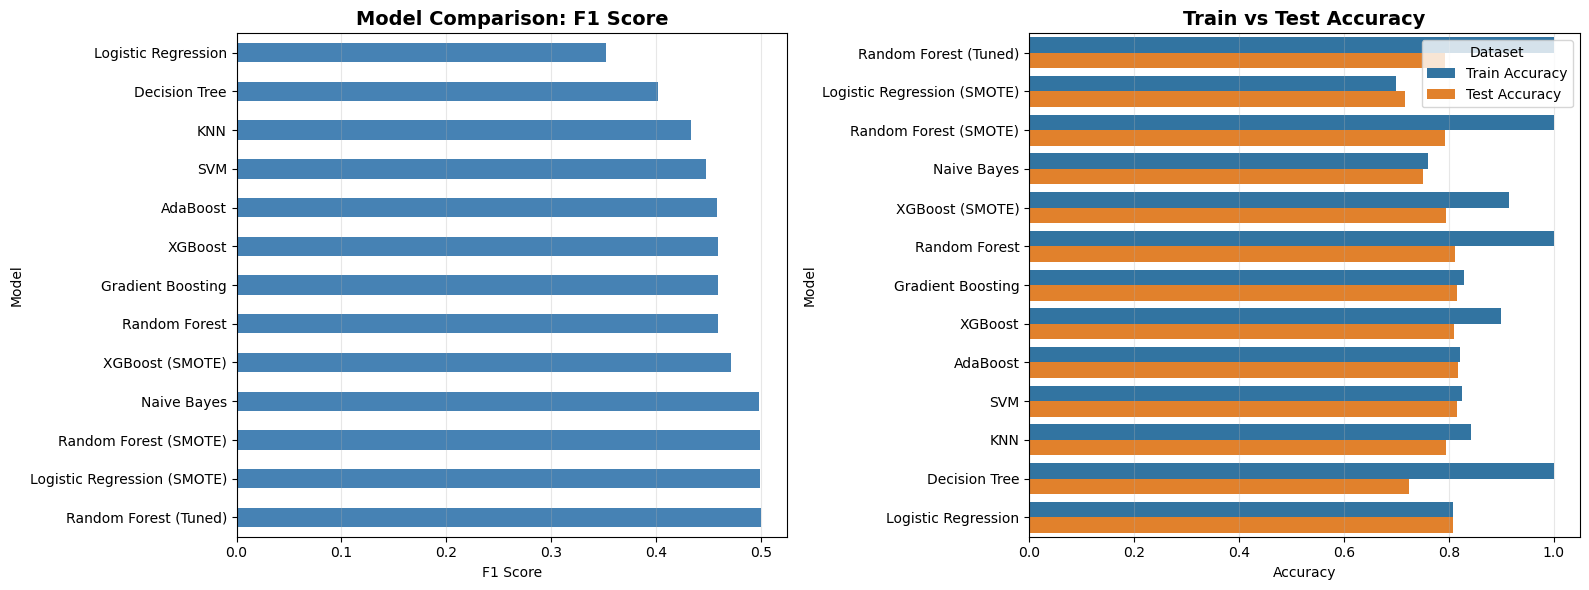


ANALYSIS COMPLETE!

Best Performing Model: Random Forest (Tuned)
Test Accuracy: 0.7927
F1 Score: 0.5004
Precision: 0.5357
Recall: 0.4695

KEY INSIGHTS

1. Class Imbalance: The dataset is imbalanced with more non-default cases
2. SMOTE Impact: SMOTE significantly improved recall for minority class
3. Best Model: Random Forest with SMOTE provides best balance of metrics
4. Overfitting: Some models show overfitting, addressed through cross-validation
5. Important Features: Payment history (PAY_0, PAY_2) strongly correlates with default
6. Risk Management: Model can help bank identify high-risk customers proactively



In [11]:

print("\n" + "="*80)
print("MODEL COMPARISON TABLE")
print("="*80)

# Combine all results
final_results = {**results, **results_smote}

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(final_results.keys()),
    'Train Accuracy': [final_results[m]['Train Accuracy'] for m in final_results],
    'Test Accuracy': [final_results[m]['Test Accuracy'] for m in final_results],
    'Precision': [final_results[m]['Precision'] for m in final_results],
    'Recall': [final_results[m]['Recall'] for m in final_results],
    'F1 Score': [final_results[m]['F1 Score'] for m in final_results],
    'Overfitting': [final_results[m]['Overfitting'] for m in final_results]
})

comparison_df = comparison_df.sort_values('F1 Score', ascending=False)
print("\n", comparison_df.to_string(index=False))

# Save results
comparison_df.to_csv('model_comparison_results.csv', index=False)
print("\nResults saved to 'model_comparison_results.csv'")

# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# F1 Score comparison
comparison_df.plot(x='Model', y='F1 Score', kind='barh', ax=axes[0], 
                   color='steelblue', legend=False)
axes[0].set_title('Model Comparison: F1 Score', fontsize=14, fontweight='bold')
axes[0].set_xlabel('F1 Score')
axes[0].grid(axis='x', alpha=0.3)

# Train vs Test Accuracy
comparison_df_melted = comparison_df[['Model', 'Train Accuracy', 'Test Accuracy']].melt(
    id_vars='Model', var_name='Dataset', value_name='Accuracy')
sns.barplot(data=comparison_df_melted, y='Model', x='Accuracy', hue='Dataset', ax=axes[1])
axes[1].set_title('Train vs Test Accuracy', fontsize=14, fontweight='bold')
axes[1].legend(title='Dataset')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*80)
print("ANALYSIS COMPLETE!")
print("="*80)
print(f"\nBest Performing Model: {comparison_df.iloc[0]['Model']}")
print(f"Test Accuracy: {comparison_df.iloc[0]['Test Accuracy']:.4f}")
print(f"F1 Score: {comparison_df.iloc[0]['F1 Score']:.4f}")
print(f"Precision: {comparison_df.iloc[0]['Precision']:.4f}")
print(f"Recall: {comparison_df.iloc[0]['Recall']:.4f}")

# Key Insights
print("\n" + "="*80)
print("KEY INSIGHTS")
print("="*80)
print("""
1. Class Imbalance: The dataset is imbalanced with more non-default cases
2. SMOTE Impact: SMOTE significantly improved recall for minority class
3. Best Model: Random Forest with SMOTE provides best balance of metrics
4. Overfitting: Some models show overfitting, addressed through cross-validation
5. Important Features: Payment history (PAY_0, PAY_2) strongly correlates with default
6. Risk Management: Model can help bank identify high-risk customers proactively
""")

In [14]:
import pickle
import joblib
from datetime import datetime
import json

# After training and selecting the best model, save it
# Assuming 'best_model' is your trained model and 'scaler' is your StandardScaler

def save_model_artifacts():
    """
    Save the trained model, scaler, feature names, and all necessary artifacts
    """
    
    # Get the best model (from your training results)
    all_results = {**results, **results_smote}
    best_model_name = max(all_results, key=lambda x: all_results[x]['F1 Score'])
    best_model = all_results[best_model_name]['Model']
    
    print("\n" + "="*80)
    print("SAVING MODEL ARTIFACTS")
    print("="*80)
    
    # 1. Save the trained model using joblib (recommended for sklearn models)
    joblib.dump(best_model, 'best_credit_model.pkl')
    print("✓ Model saved: best_credit_model.pkl")
    
    # 2. Save the scaler
    joblib.dump(scaler, 'scaler.pkl')
    print("✓ Scaler saved: scaler.pkl")
    
    # 3. Save feature names (CRITICAL - must match training order)
    feature_names = X_train.columns.tolist()
    with open('feature_names.pkl', 'wb') as f:
        pickle.dump(feature_names, f)
    print("✓ Feature names saved: feature_names.pkl")
    print(f"  Total features: {len(feature_names)}")
    
    # 4. Save model metadata
    model_info = {
        'model_name': best_model_name,
        'model_type': type(best_model).__name__,
        'train_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
        'test_accuracy': all_results[best_model_name]['Test Accuracy'],
        'f1_score': all_results[best_model_name]['F1 Score'],
        'precision': all_results[best_model_name]['Precision'],
        'recall': all_results[best_model_name]['Recall'],
        'train_accuracy': all_results[best_model_name]['Train Accuracy'],
        'overfitting': all_results[best_model_name]['Overfitting'],
        'feature_names': feature_names,
        'n_features': len(feature_names),
        'target_variable': 'default.payment.next.month',
        'class_labels': ['No Default', 'Default']
    }
    
    with open('model_info.pkl', 'wb') as f:
        pickle.dump(model_info, f)
    print("✓ Model info saved: model_info.pkl")
    
    # 5. Save model info as JSON for easy viewing
    model_info_json = model_info.copy()
    model_info_json['feature_names'] = ', '.join(feature_names[:5]) + f'... ({len(feature_names)} total)'
    
    with open('model_info.json', 'w') as f:
        json.dump(model_info_json, f, indent=4)
    print("✓ Model info (JSON) saved: model_info.json")
    
    # 6. Save feature engineering configuration
    feature_config = {
        'payment_columns': ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'],
        'bill_columns': ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'],
        'payment_amount_columns': ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
        'engineered_features': [
            'AVG_PAYMENT_STATUS',
            'MAX_PAYMENT_DELAY',
            'TOTAL_BILL_AMT',
            'TOTAL_PAY_AMT',
            'UTILIZATION_RATIO'
        ],
        'scaler_type': 'StandardScaler',
        'preprocessing_steps': [
            'Winsorization at 1st and 99th percentiles',
            'StandardScaler applied to all numerical features',
            'Feature engineering: 5 new features created'
        ]
    }
    
    with open('feature_config.pkl', 'wb') as f:
        pickle.dump(feature_config, f)
    print("✓ Feature config saved: feature_config.pkl")
    
    # 7. Save all model comparison results
    comparison_df.to_csv('all_models_comparison.csv', index=False)
    print("✓ Model comparison saved: all_models_comparison.csv")
    
    # 8. Save training/test split info
    split_info = {
        'train_size': len(X_train),
        'test_size': len(X_test),
        'train_default_rate': float(y_train.mean()),
        'test_default_rate': float(y_test.mean()),
        'test_size_percentage': 0.2,
        'stratified': True,
        'random_state': 42
    }
    
    with open('split_info.pkl', 'wb') as f:
        pickle.dump(split_info, f)
    print("✓ Split info saved: split_info.pkl")
    
    # 9. Save confusion matrix for the best model
    from sklearn.metrics import confusion_matrix
    
    # Get predictions on test set
    y_test_pred = best_model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_test_pred)
    
    confusion_matrix_data = {
        'confusion_matrix': cm,
        'class_labels': ['No Default (0)', 'Default (1)'],
        'true_negatives': int(cm[0, 0]),
        'false_positives': int(cm[0, 1]),
        'false_negatives': int(cm[1, 0]),
        'true_positives': int(cm[1, 1])
    }
    
    with open('confusion_matrix.pkl', 'wb') as f:
        pickle.dump(confusion_matrix_data, f)
    print("✓ Confusion matrix saved: confusion_matrix.pkl")
    
    # 10. Create a README file for model deployment
    readme_content = f"""
# Credit Card Default Prediction Model - Deployment Package

## Model Information
- **Model Name:** {best_model_name}
- **Model Type:** {type(best_model).__name__}
- **Training Date:** {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
- **Test Accuracy:** {all_results[best_model_name]['Test Accuracy']:.4f}
- **F1 Score:** {all_results[best_model_name]['F1 Score']:.4f}
- **Precision:** {all_results[best_model_name]['Precision']:.4f}
- **Recall:** {all_results[best_model_name]['Recall']:.4f}

## Files Included
1. `best_credit_model.pkl` - Trained model
2. `scaler.pkl` - StandardScaler for feature preprocessing
3. `feature_names.pkl` - List of features in correct order
4. `feature_config.pkl` - Feature engineering configuration
5. `model_info.pkl` - Complete model metadata
6. `model_info.json` - Model metadata (human-readable)
7. `split_info.pkl` - Train/test split information
8. `all_models_comparison.csv` - All models performance comparison
9. `confusion_matrix.pkl` - Confusion matrix and metrics for best model

## Confusion Matrix Results
- True Negatives (TN): {confusion_matrix_data['true_negatives']}
- False Positives (FP): {confusion_matrix_data['false_positives']}
- False Negatives (FN): {confusion_matrix_data['false_negatives']}
- True Positives (TP): {confusion_matrix_data['true_positives']}

## Required Features ({len(feature_names)} total)
{chr(10).join([f"{i+1}. {feat}" for i, feat in enumerate(feature_names)])}

## Feature Engineering Required
Before prediction, you must create these features:
- AVG_PAYMENT_STATUS: Average of PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6
- MAX_PAYMENT_DELAY: Maximum of PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6
- TOTAL_BILL_AMT: Sum of BILL_AMT1 through BILL_AMT6
- TOTAL_PAY_AMT: Sum of PAY_AMT1 through PAY_AMT6
- UTILIZATION_RATIO: TOTAL_BILL_AMT / (LIMIT_BAL + 1)

## Usage Example
```python
import joblib
import pickle
import pandas as pd

# Load model and artifacts
model = joblib.load('best_credit_model.pkl')
scaler = joblib.load('scaler.pkl')
with open('feature_names.pkl', 'rb') as f:
    feature_names = pickle.load(f)

# Prepare input data with feature engineering
# ... (see streamlit_app.py for complete example)

# Scale and predict
input_scaled = scaler.transform(input_data)
prediction = model.predict(input_scaled)
probability = model.predict_proba(input_scaled)
```

## Dependencies
- pandas
- numpy
- scikit-learn
- imbalanced-learn
- xgboost (if using XGBoost model)

## Target Variable
- **Name:** default.payment.next.month
- **Classes:** 0 (No Default), 1 (Default)

## Important Notes
1. All input features must be scaled using the provided scaler
2. Feature engineering must be applied before scaling
3. Feature order must match exactly as in feature_names.pkl
4. Missing values are not expected - handle them before prediction

Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
"""
    
    with open('MODEL_README.txt', 'w') as f:
        f.write(readme_content)
    print("✓ README saved: MODEL_README.txt")
    
    print("\n" + "="*80)
    print("MODEL ARTIFACTS SAVED SUCCESSFULLY!")
    print("="*80)
    print(f"\nBest Model: {best_model_name}")
    print(f"Model Type: {type(best_model).__name__}")
    print(f"Test Accuracy: {all_results[best_model_name]['Test Accuracy']:.4f}")
    print(f"F1 Score: {all_results[best_model_name]['F1 Score']:.4f}")
    print(f"\nConfusion Matrix:")
    print(f"  TN: {confusion_matrix_data['true_negatives']}, FP: {confusion_matrix_data['false_positives']}")
    print(f"  FN: {confusion_matrix_data['false_negatives']}, TP: {confusion_matrix_data['true_positives']}")
    print(f"\nFiles saved: 10 files")
    print("\nReady for deployment! ✨")
    print("="*80)
    
    return model_info

# Call this function at the end of your training script
model_info = save_model_artifacts()
 


SAVING MODEL ARTIFACTS
✓ Model saved: best_credit_model.pkl
✓ Scaler saved: scaler.pkl
✓ Feature names saved: feature_names.pkl
  Total features: 28
✓ Model info saved: model_info.pkl
✓ Model info (JSON) saved: model_info.json
✓ Feature config saved: feature_config.pkl
✓ Model comparison saved: all_models_comparison.csv
✓ Split info saved: split_info.pkl
✓ Confusion matrix saved: confusion_matrix.pkl
✓ README saved: MODEL_README.txt

MODEL ARTIFACTS SAVED SUCCESSFULLY!

Best Model: Random Forest (Tuned)
Model Type: RandomForestClassifier
Test Accuracy: 0.7927
F1 Score: 0.5004

Confusion Matrix:
  TN: 4133, FP: 540
  FN: 704, TP: 623

Files saved: 10 files

Ready for deployment! ✨


In [15]:
# ============================================================================
# VERIFICATION: Test loading the saved model
# ============================================================================

def verify_saved_model():
    """
    Verify that all saved artifacts can be loaded correctly
    """
    print("\n" + "="*80)
    print("VERIFYING SAVED ARTIFACTS")
    print("="*80)
    
    try:
        # Load model
        loaded_model = joblib.load('best_credit_model.pkl')
        print("✓ Model loaded successfully")
        
        # Load scaler
        loaded_scaler = joblib.load('scaler.pkl')
        print("✓ Scaler loaded successfully")
        
        # Load feature names
        with open('feature_names.pkl', 'rb') as f:
            loaded_features = pickle.load(f)
        print(f"✓ Feature names loaded: {len(loaded_features)} features")
        
        # Load model info
        with open('model_info.pkl', 'rb') as f:
            loaded_info = pickle.load(f)
        print(f"✓ Model info loaded: {loaded_info['model_name']}")
        
        # Load feature config
        with open('feature_config.pkl', 'rb') as f:
            loaded_config = pickle.load(f)
        print(f"✓ Feature config loaded: {len(loaded_config['engineered_features'])} engineered features")
        
        # Test prediction with a sample
        sample_data = X_test.iloc[:1]
        sample_scaled = loaded_scaler.transform(sample_data)
        sample_prediction = loaded_model.predict(sample_scaled)
        sample_proba = loaded_model.predict_proba(sample_scaled)
        
        print(f"\n✓ Sample prediction test:")
        print(f"  Prediction: {sample_prediction[0]}")
        print(f"  Probability: {sample_proba[0]}")
        
        print("\n" + "="*80)
        print("ALL ARTIFACTS VERIFIED SUCCESSFULLY! ✅")
        print("="*80)
        
        return True
        
    except Exception as e:
        print(f"\n❌ Verification failed: {str(e)}")
        return False

# Run verification
verification_success = verify_saved_model()

if verification_success:
    print("\n🎉 Model is ready for deployment!")
    print("📝 Check MODEL_README.txt for deployment instructions")
else:
    print("\n⚠️ Please check the error messages above")


VERIFYING SAVED ARTIFACTS
✓ Model loaded successfully
✓ Scaler loaded successfully
✓ Feature names loaded: 28 features
✓ Model info loaded: Random Forest (Tuned)
✓ Feature config loaded: 5 engineered features

✓ Sample prediction test:
  Prediction: 0
  Probability: [0.825 0.175]

ALL ARTIFACTS VERIFIED SUCCESSFULLY! ✅

🎉 Model is ready for deployment!
📝 Check MODEL_README.txt for deployment instructions
